# Importando módulos e carregando dados

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
df_sinasc_es_2016 = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSkaN1Ye-7puUZMT3J_yuJisowxrmsU3BAsvyfI3ZxD_mKPJ_4fjfnUS9_JH83fAocKWjyRquGMJxde/pub?output=csv')
df_sim_es_2016 = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vR_MH3HjwGWD0icAnZ3LVxxKUIxYNgAE3R-m-P61g0T2iXE9bs3hjeItGKTJqIUslIOAFN7TrE2ghGM/pub?output=csv')

In [0]:
df_mortalidade_infantil = pd.merge(df_sinasc_es_2016, df_sim_es_2016, how='inner', on = 'NUMERODN')

In [4]:
# encontrando inconsistencia de dados na data de nascimento entre sinasc e sim

for i in range(df_mortalidade_infantil.shape[0]):
  if(df_mortalidade_infantil['DTNASC_x'][i] != df_mortalidade_infantil['DTNASC_y'][i]):
    print(df_mortalidade_infantil['DTNASC_x'][i],df_mortalidade_infantil['DTNASC_y'][i])

23032016 nan
22012016 21012016.0
9012016 8012016.0
29012016 19012016.0
1062016 nan
21062016 24062016.0


# Manipulando datas


In [0]:
import datetime

In [6]:
array_idade_dias = np.array([])
for i in range(df_mortalidade_infantil.shape[0]):
  data = df_mortalidade_infantil['DTNASC_x'][i].astype(str)
  if len(data) == 7:
    data = '0' + data
  
  data = data[4:] + '-' + data[2:4] + '-' + data[0:2]
  data_nasc = datetime.datetime.strptime(data, '%Y-%m-%d')
  
  data = df_mortalidade_infantil['DTOBITO'][i].astype(str)
  if len(data) == 7:
    data = '0' + data
  
  data = data[4:] + '-' + data[2:4] + '-' + data[0:2]
  data_obito = datetime.datetime.strptime(data, '%Y-%m-%d')
  
  #if i >= 0 and i <=10:
  #  print(df_mortalidade_infantil['DTOBITO'][i], df_mortalidade_infantil['DTNASC_x'][i])
  num_dias = (data_obito - data_nasc).days
  #if num_dias < 8:
  array_idade_dias = np.append(array_idade_dias, num_dias)
array_idade_dias

array([  5.,  31.,   2.,   0.,   1.,   5.,  17.,  52.,  84.,   4.,  18.,
         1.,   1.,  18.,   2.,  60.,   5.,   0.,   4.,   1.,   2.,  21.,
         0.,   0.,  12.,  38.,  47.,  67.,  37.,  66.,  10.,   4., 200.,
        12., 102.,   6.,  12.,   1.,   1.,   0., 151.,   0.,  24.,  44.,
         0.,   1.,   0.,   8., 133., 182.,   1.,   0.,   7.,  11.,   1.,
        65.,   1.,   0.,   9.,   3.,  61.,   1.,  21.,   3.,   2.,   2.,
         0.,   1.,   2., 122.,   4., 235.,   3.,   7.,   0.,   0., 268.,
        24.,   1.,   2.,  13.,  10.,   2.,  46.,   1.,  12.,   4.,   1.,
        32.,   1.,  13.,  12.,   6.,   0.,   4.,   1.,   6.,   0.,   0.,
        43.,   1.,  17.,   6.,   5.,   4.,  21.,   0.,  20.,  25.,   3.,
        39.,  11.,   5.,   4.,   0.,   0.,   2.,   7.,  34.,   0.,   0.,
         0.,   2.,   6.,   2.,   0.,   0.,   0.,   0.,  52.,   3.,   1.,
         0.,   0.,   0.,  29.,   2.,  86.,   0.,   0.,  34., 235.,  11.,
         4.,   0.,   0.,   0.,   2.,   5.,   1.,   

In [0]:
series_idade_dias = pd.Series(array_idade_dias)

In [8]:
# porcentagem neonatal
((series_idade_dias < 29) == True).sum() / series_idade_dias.shape[0]

0.8067796610169492

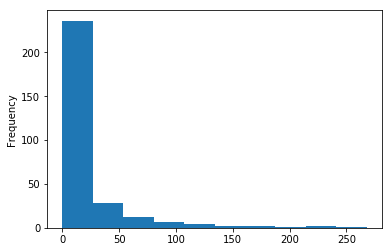

In [9]:
series_idade_dias.plot.hist()

# Vendo idade por ano (de todos do SIM)

In [0]:

array_idade_sim = np.array([])
for i in range(df_sim_es_2016.shape[0]):
  data = df_sim_es_2016['DTNASC'][i].astype(int).astype(str)
  if len(data) == 7:
    data = '0' + data
  if len(data) < 2 or len(data) > 8:
    continue
  data = data[4:] + '-' + data[2:4] + '-' + data[0:2]
  data_nasc = datetime.datetime.strptime(data, '%Y-%m-%d')
  
  data = df_sim_es_2016['DTOBITO'][i].astype(int).astype(str)
  if len(data) == 7:
    data = '0' + data
  
  if len(data) < 2 or len(data) > 8:
    continue
    
  data = data[4:] + '-' + data[2:4] + '-' + data[0:2]
  data_obito = datetime.datetime.strptime(data, '%Y-%m-%d')
  
  num_anos = abs((data_obito - data_nasc).days/365)
  
  array_idade_sim = np.append(array_idade_sim, num_anos)


In [0]:
series_idade_sim = pd.Series(array_idade_sim)

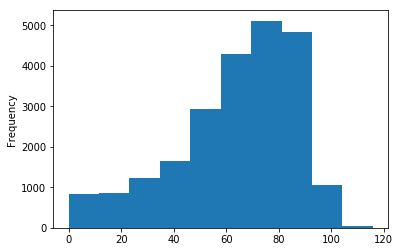

In [12]:
series_idade_sim.plot.hist()

# Dataframe do sinasc que não ocorreu óbito

In [13]:
df_left = pd.merge(df_sinasc_es_2012_raw, df_sim_es_2012_raw, how='left', on='NUMERODN')

NameError: ignored

In [0]:
df_left = df_left[df_left['DTOBITO'].isna() == True]

# Comparado variaveis

In [0]:
df_mortalidade_infantil['CONSULTAS'].plot.hist()

In [0]:
df_left[df_left['NUMERODN'].isna() == False]['CONSULTAS'].plot.hist()

In [0]:
df_mortalidade_infantil[df_mortalidade_infantil['RACACOR_x'].isna() == False]['RACACOR_x'].plot.hist()

In [0]:
df_left[df_left['RACACOR_x'].isna() == False]['RACACOR_x'].plot.hist()

In [0]:
df_mortalidade_infantil[(df_mortalidade_infantil['APGAR1'].isna() == False) & (df_mortalidade_infantil['APGAR1'] < 11)]['APGAR1'].plot.hist()

In [0]:
df_left[(df_left['APGAR1'].isna() == False) & (df_left['APGAR1'] < 11)]['APGAR1'].plot.hist()